In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = "../data/titanic.csv"

In [3]:
data = pd.read_csv(data_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [4]:
data.shape

(891, 12)

- There are totoal of **891** records and **12** features in the dataset

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Feature Information

- **PassengerId**: Id of the record. It has no contribution to the prediction of the target variable.
- **Survived**: The target variable. It is a binary variable indicating whether the passenger survived or not.
  - 1: represents that the passenger *survived*.
  - 0: represents that the passenger did *not survived*.
- **Pclass**: The class of the passenger.
  - 1: Upper Class
  - 2: Middle Class
  - 3: Lower Class
- **Name**: The name of the passenger.
- **Sex**: The gender of the passenger.
- **Age**: The age of the passenger.
- **SibSp**: Sum of all siblings and spouse of the passenger.
- **Parch**: Sum of parents and children of passenger.
- **Ticket**: Ticket number of the passenger.
- **Fare**: Amount paid by the passenger.
- **Cabin**: Cabin number of the passenger.
- **Embarked**: Port of embarkation.
  - C: Cherbourg
  - S: Southampton
  - Q: Queenstown

#### Statistical Glance of every Numeric Columns

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Summary about dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Data type of columns
| Numeric | Text |
| ------- | ---- |
|    7    |   5  |

#### Missing Values

In [8]:
def select_columns_with_missing_values(data: pd.DataFrame):
    print("Count of missing values\n" + "---"*10)
    total_records = data.shape[0]
    for col in data.columns:
        if (count := data[col].isnull().sum()):
            print(f"{col} : {count} ({count*100/total_records:.2f}%)")
            
select_columns_with_missing_values(data)
            

Count of missing values
------------------------------
Age : 177 (19.87%)
Cabin : 687 (77.10%)
Embarked : 2 (0.22%)


##### Columns with missing values
|          |  Age  |  Cabin  |  Embarked  |
| -------- | ----- | ------- | ---------- |
| Null     |  177  |   687   |     2      |
| Not Null |  714  |   204   |    889     |
|  Total   |  891  |   891   |    891     |

#### Impute missing values in **Age**

In [9]:
corr_with_age = data.select_dtypes('number').corr().abs().unstack()
corr_with_age['Age'].sort_values(ascending=False).to_frame().rename(columns={0: 'Correlation with Age'})

,Correlation with Age
Age,1.000000
Pclass,0.369226
SibSp,0.308247
Parch,0.189119
Fare,0.096067
Survived,0.077221
PassengerId,0.036847


In [10]:
corr_with_age['Pclass'].sort_values(ascending=False).to_frame().rename(columns={0: 'Correlation with Pclass'})

,Correlation with Pclass
Pclass,1.000000
Fare,0.549500
Age,0.369226
Survived,0.338481
SibSp,0.083081
PassengerId,0.035144
Parch,0.018443


- Feature *Pclass* is correlated with feature *Age* (~0.37) and target feature *Survived* (~0.34).
- So, it will be meaningful to impute the missing values of age by median age of different class of passengers.

The median age might differ in gender. Lets check.

In [11]:
def median_age_by_gender(data: pd.DataFrame): 
    print("Median Age by Gender\n" + "--"*10)
    for gender in data['Sex'].unique():
        median_val = data[data['Sex'] == gender]['Age'].median()
        print(f"{gender}: {median_val}")
median_age_by_gender(data)

Median Age by Gender
--------------------
male: 29.0
female: 27.0


- The median age of male is slightly greater then median age of female.
- The median age of male and female can also differ in different class of passenger. Let's Check

In [12]:
print("Median Age by class and Gender\n" + "---"*10)
data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).median()['Age'].to_frame()

Median Age by class and Gender
------------------------------


Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

It is clearly seen that the median age of *male* is **greater** then median age of *female* in each class group.
- Imputing with median age grouped by class and gender of passenger 

In [13]:
data['Age'] = data['Age'].fillna(
    data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex'])['Age'].transform('median')
)

In [14]:
data['Age'].isna().sum()

0

#### Impute missing values in **Embarked**

In [15]:
data['Embarked'].isna().sum()

2

There are only two missing values. So, lets take closer look at both of the missing values.

In [16]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- Only the difference between these two records are the name and age. 
- They have same ticket number and cabin. So they might belong to same family.
- On searching the internet about these two names, they were embarked from **Southampton**.

In [17]:
# # Filling the missing values with S
data['Embarked'] = data['Embarked'].fillna("S")

In [18]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
select_columns_with_missing_values(data)

Count of missing values
------------------------------
Cabin : 687 (77.10%)


#### Impute missing values in Cabin

![](../data/images/Titanics4.png)

![](../data/images/84758.gif)

In [20]:
data[data["Survived"] == 1]["Cabin"].unique()

array(['C85', nan, 'C123', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33', 'C52',
       'B28', 'F33', 'C23 C25 C27', 'D10 D12', 'E101', 'F E69', 'D47',
       'C2', 'E33', 'F4', 'F2', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93',
       'C83', 'D35', 'B77', 'C125', 'C99', 'D7', 'B49', 'C106', 'B58 B60',
       'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34',
       'C32', 'D', 'B18', 'E40', 'D37', 'B35', 'E50', 'B96 B98', 'C78',
       'E10', 'A34', 'C104', 'C92', 'D21', 'E12', 'D20', 'B79', 'E25',
       'B73', 'B39', 'B22', 'C70', 'A16', 'E67', 'C101', 'E44', 'C68',
       'E68', 'B41', 'A20', 'D19', 'D9', 'A23', 'B50', 'A26', 'C126',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90', 'C45',
       'E8', 'B101', 'D45', 'E121', 'D11', 'B3', 'D17', 'B69', 'E49',
       'C47', 'D28', 'E17', 'C50', 'B42', 'C148'], dtype=object)

##### The values of feature Cabin can be broken down into two parts:
- First letter: Name of the deck
- Successive letters: cabin number in particular deck 

In [21]:
import numpy as np


sorted(set(
    [
        cabin[0] 
        for cabin in data["Cabin"].unique() 
        if pd.notna(cabin)
    ]
))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

- Athrough, Titanic ship contained deck from A to P excluding I and T, our dataset contains the records for dataset from A to G. 
- Creating new feature Deck and dropping the feature Cabin.

In [22]:
# Create a new feature for deck 
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else "_M")
data.drop(['Cabin'], axis=1, inplace=True)

In [23]:
decks = data.groupby(['Deck', 'Pclass']).count().drop(
    columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'PassengerId', 'Ticket']
).rename(
    columns={'Name': 'Count'}
).transpose()
decks

Deck     A   B   C   D      E        F     G  T  _M          
Pclass   1   1   1   1  2   1  2  3  2  3  3  1   1    2    3
Count   15  47  59  29  4  25  4  3  8  5  4  1  40  168  479

In [24]:
def pclass_decks(decks):
    class_decks = {}
    for deck in decks.columns.levels[0]:
        class_decks[deck] = []
        for pclass in range(1, 4):
            try:
                class_decks[deck].append(decks[deck][pclass][0])
            except KeyError:
                class_decks[deck].append(0)

    df_class_decks = pd.DataFrame(class_decks, index=[1, 2, 3])
    
    df_class_decks_percent = df_class_decks.copy()
    
    for col in df_class_decks_percent.columns:
        df_class_decks_percent[col] = df_class_decks_percent[col] / df_class_decks_percent[col].sum()
    return df_class_decks_percent, df_class_decks

df_class_decks_percent, df_class_decks = pclass_decks(decks)
df_class_decks

C:\Users\rajba\AppData\Local\Temp\ipykernel_12756\1843405226.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_decks[deck].append(decks[deck][pclass][0])


,A,B,C,D,E,F,G,T,_M
1,15,47,59,29,25,0,0,1,40
2,0,0,0,4,4,8,0,0,168
3,0,0,0,0,3,5,4,0,479


In [25]:
df_class_decks_percent

,A,B,C,D,E,F,G,T,_M
1,1.0,1.0,1.0,0.878788,0.78125,0.000000,0.0,1.0,0.058224
2,0.0,0.0,0.0,0.121212,0.12500,0.615385,0.0,0.0,0.244541
3,0.0,0.0,0.0,0.000000,0.09375,0.384615,1.0,0.0,0.697234


Text(0.5, 1.0, 'Count of Passenger by class in each deck')

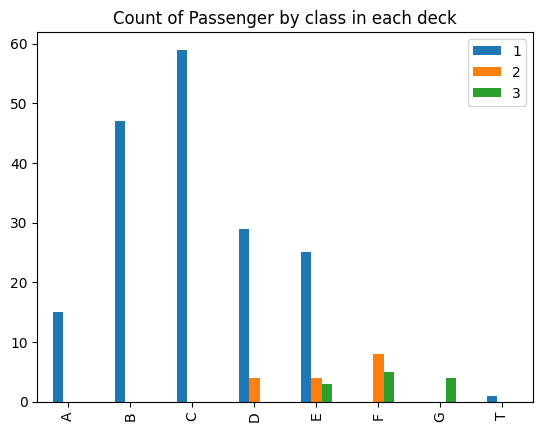

In [26]:
df_class_decks.drop('_M', axis=1).transpose().plot.bar()
plt.title("Count of Passenger by class in each deck")

- Missings are removed for clear visulization as large number of records have decks missing

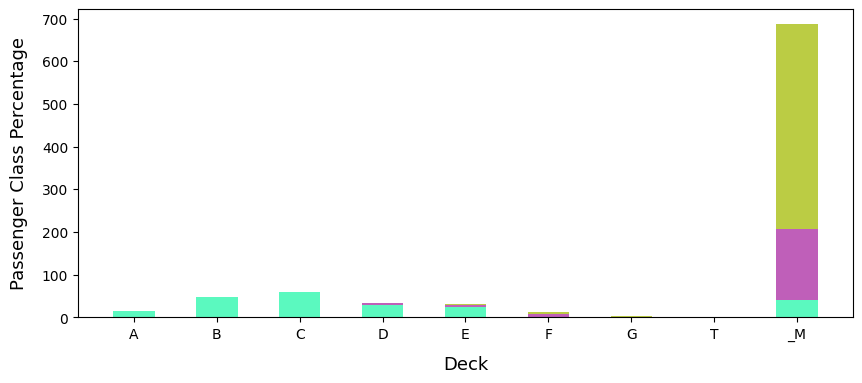

In [27]:
def pclass_percent_per_deck(df: pd.DataFrame):
    deck_names = list(df.columns)
    n_bars = np.arange(len(deck_names))
    bar_w = 0.5
    
    pclass1 = df_class_decks.loc[1]
    pclass2 = df_class_decks.loc[2]
    pclass3 = df_class_decks.loc[3]
    
    plt.figure(figsize=(10, 4))
    plt.bar(n_bars, pclass1, color='#5bf9bf', width=bar_w, label='Passenger Class 1')
    plt.bar(n_bars, pclass2, bottom=pclass1, color='#bf5fb9', width=bar_w, label='Passenger Class 2')
    plt.bar(n_bars, pclass3, bottom=pclass1 + pclass2, color='#bbcc44', width=bar_w, label='Passenger Class 2')
    
    plt.xlabel('Deck', size=13, labelpad=10)
    plt.ylabel('Passenger Class Percentage', size=13, labelpad=10)
    plt.xticks(n_bars, deck_names)    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
pclass_percent_per_deck(df_class_decks)

- All the passengers in decks A, B, C, and T are 1st class passengers.
- Most of passengers in decks D and E are 1st class passenngers
- Deck D passengers are 1st and 2nd class.
- Deck E passengers are 1st, 2nd and 3rd class.
- Deck F passengers are 2nd and 3rd class.
- Deck G passengers are 3rd class.

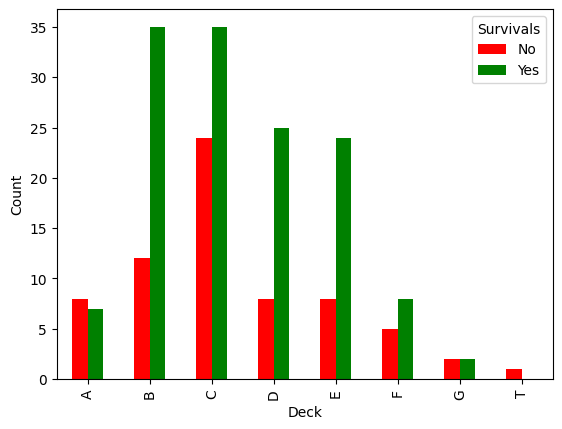

In [28]:
survived_each_deck = data[data['Deck'] != "_M"].groupby(['Deck', 'Survived']).count().drop(
    columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']
).rename(
    columns={'PassengerId': 'Count'}
)

survived_each_deck.unstack().plot.bar(color=['red', 'green'], label=['Not Survived', 'Survived'])
plt.ylabel('Count')
plt.legend(["No", "Yes"], title="Survivals")

- Missings are not used for clear visulization as large number of records have decks missing
- Number of passengers who survived is higher than not survived in the decks B, C, D, and E.

- The Deck T has only one passenger and is located closest to deck A so groupin with deck A.
- The deck A, B, and C will be renamed as Deck ABC as the passengers are of 1st class.
- It seems impossible to find the cabin of missing passenger. Leaving as it is.

In [29]:
idx = data[data['Deck'] == 'T'].index
data.loc[idx, 'Deck'] = 'A'

In [30]:
data["Deck"] = data["Deck"].replace(['A', 'B', 'C'], 'ABC')
data["Deck"].value_counts()

Deck
_M     687
ABC    122
D       33
E       32
F       13
G        4
Name: count, dtype: int64

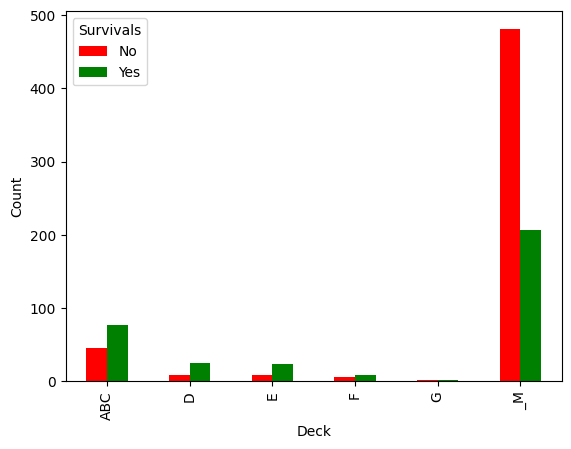

In [31]:
survived_each_deck = data.groupby(['Deck', 'Survived']).count().drop(
    columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']
).rename(
    columns={'PassengerId': 'Count'}
)

survived_each_deck.unstack().plot.bar(color=['red', 'green'], label=['Not Survived', 'Survived'])
plt.ylabel('Count')
plt.legend(["No", "Yes"], title="Survivals")

In [32]:
select_columns_with_missing_values(data)

Count of missing values
------------------------------


In [33]:
data.drop(['PassengerId'], axis=1, inplace=True)

#### Lets plot the distribution of target feature `Survived`

In [34]:
survived_records = data[data['Survived'] == 1].shape[0]
not_survived_records = data[data['Survived'] == 0].shape[0]
n_records = data.shape[0]
survived_percent = (survived_records / n_records) * 100
not_survived_percent = (not_survived_records / n_records) * 100

survived_percent, not_survived_percent, survived_percent + not_survived_percent

(38.38383838383838, 61.61616161616161, 100.0)

Text(0.5, 1.0, 'Survival Rate')

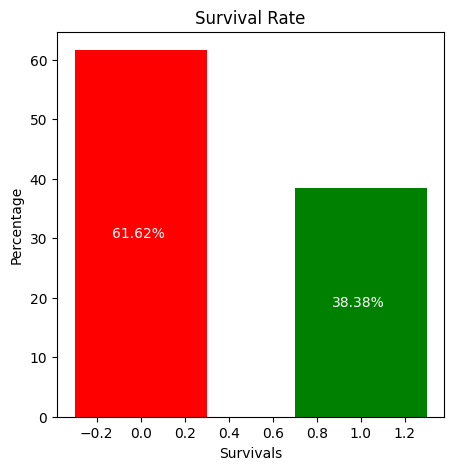

In [35]:
# fig = plt.figure(figsize=(5, 5))
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.bar(
    np.arange(2),
    [not_survived_percent, survived_percent], 
    color=['red', 'green'],
    width=0.6
)

for bar, percent in zip(
    ax.patches, [f"{not_survived_percent:.2f}%", f"{survived_percent:.2f}%"]
):
    ax.text(
        bar.get_x()+bar.get_width()*2/7, 
        bar.get_y()+bar.get_height()/2, percent, 
        color = 'white', 
        ha = 'left', 
        va = 'center'
    )

plt.xlabel("Survivals")
plt.ylabel("Percentage")
plt.title("Survival Rate")


In [36]:
corr = data.select_dtypes('number').corr().abs().unstack()
corr = corr.sort_values(ascending=False).reset_index()
corr = corr.rename(
    columns={
        0: 'Correlation'
    }
)
corr.drop(corr[corr['Correlation'] == 1.0].index, inplace=True)
corr.drop(corr.iloc[1::2].index, inplace=True)
corr[corr['Correlation'] > 0.1]

,level_0,level_1,Correlation
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Age,Pclass,0.413583
12,Survived,Pclass,0.338481
14,Fare,Survived,0.257307
16,SibSp,Age,0.249854
18,Fare,Parch,0.216225
20,Age,Parch,0.175526
22,SibSp,Fare,0.159651
24,Age,Fare,0.122692


- Highest Correlation exists between *Pclass* and *Fare*. 
- Higher correlation also exists between *Parch* and *SibSp* & *Age* and *Pclass*

### Relation of categorical features to target feature

In [37]:
[data["Sex"].value_counts()[x] for x in data["Sex"].unique()]

[577, 314]

C:\Users\rajba\AppData\Local\Temp\ipykernel_12756\2303079652.py:22: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


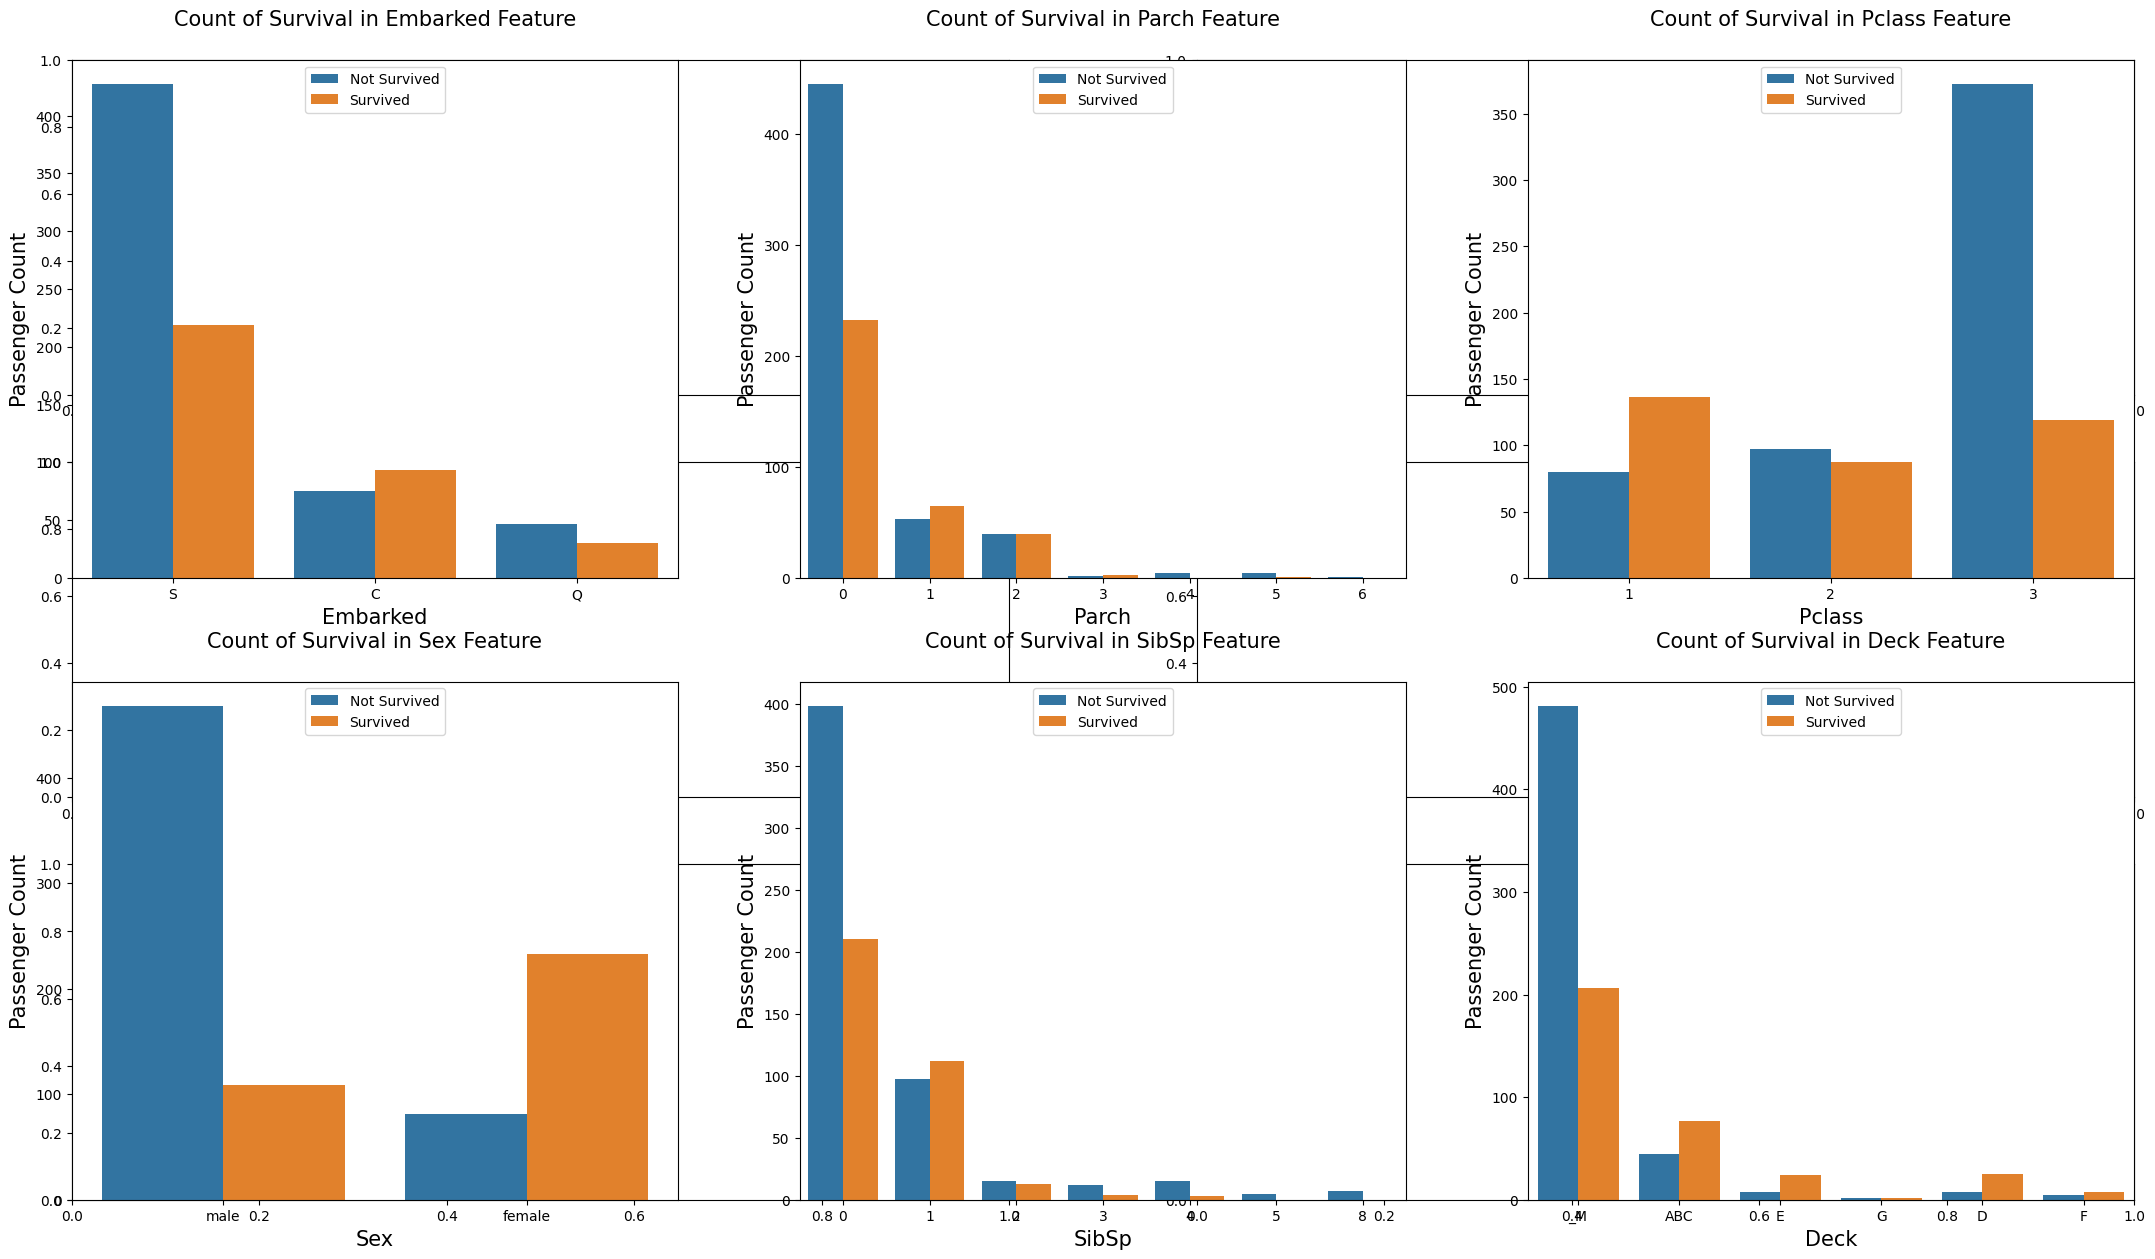

In [38]:
import seaborn as sns

def count_plot(feature):
    sns.countplot(x=feature, hue='Survived', data=data)
    
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Passenger Count', size=15)    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
    plt.title('Count of Survival in {} Feature'.format(feature), size=15, y=1.05)

cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(right=1.5, top=1.25)
for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    count_plot(feature)

plt.tight_layout()

- Passengers embarked from _S_ have higher deaths while embarked from _C_ have higher survivals
- Order of higher ratio of survials based on class is: 1st > 2nd > 3rd
- More females are survived than males.
- Passenger without parent, children, sibling and spouse have higher survival rate than others.
- Distribution of survivals with features Parch and SibSp shows same distribution.
- Decks with higher survival rate are: ABC, D, E

### Relation of continuous features to target feature

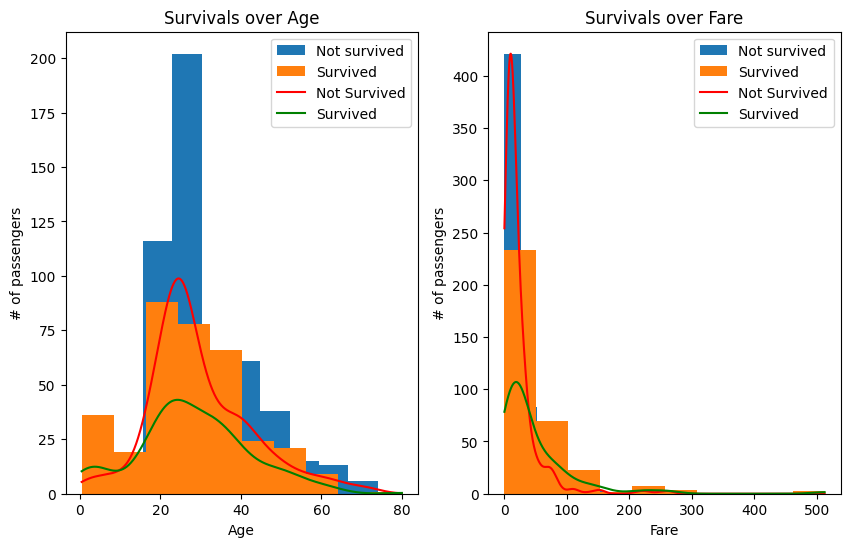

In [39]:
from scipy.stats import gaussian_kde

continuous_features = ["Age", 'Fare']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for i, feature in enumerate(continuous_features):
    ax[i].hist(
        data[data['Survived'] == 0][feature],
        label="Not survived"
    )
    ax[i].hist(
        data[data['Survived'] == 1][feature],
        label="Survived"
    )

    # Plot KDE for non-survivors
    kde = gaussian_kde(data[data['Survived'] == 0][feature])
    x = np.linspace(data[feature].min(), data[feature].max(), 1000)
    ax[i].plot(x, kde(x) * len(data[data['Survived'] == 0]) * (data[feature].max() - data[feature].min()) / 20, color='red', label='Not Survived')
    
    # Plot KDE for survivors
    kde = gaussian_kde(data[data['Survived'] == 1][feature])
    x = np.linspace(data[feature].min(), data[feature].max(), 1000)
    ax[i].plot(x, kde(x) * len(data[data['Survived'] == 1]) * (data[feature].max() - data[feature].min()) / 20, color='green', label='Survived')
    
    ax[i].legend()
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel("# of passengers")
    ax[i].set_title(f"Survivals over {feature}")

- Age less than 18 are highly survived rate than others.
- Passenger with higher fare has higher survival rate.

### Feature Engineering

In [40]:
# adding feature family size by adding number of siblings, spouse, parent and children
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1

In [41]:
data['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

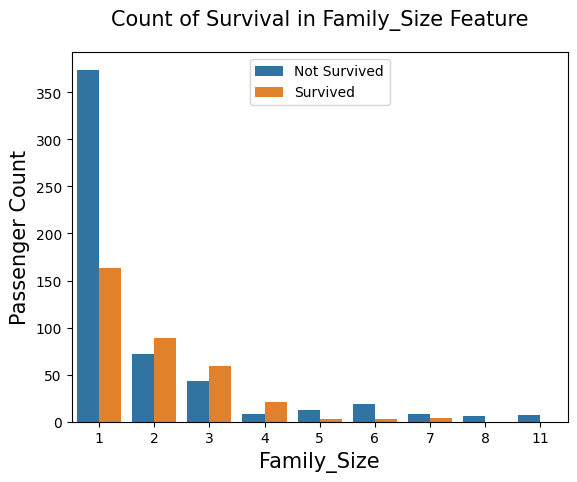

In [42]:
feature = "Family_Size"
count_plot(feature)

- Passenger without family members are survived most.
- Passenger with family size 2, 3 and 4 are survived more.
- Passenger with family size 5, 6 and 7 are less survived.
- Passenger with family size more than 7 are survived least.

#### Some passenger group might not be family but can also be friends or collegues. Often, every group will have a single ticket instead of individual ticket. 

In [43]:
n_unique  = data['Ticket'].nunique()
n_records = data['Ticket'].shape[0]
n_records == n_unique  

False

Since number of unique records is not equal to number of records in the dataset. There are groups sharing a ticket.

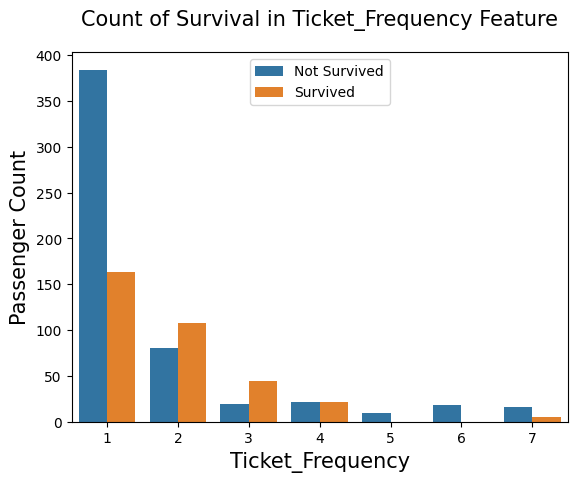

In [44]:
data['Ticket_Frequency'] = data.groupby('Ticket')['Ticket'].transform('count')
count_plot('Ticket_Frequency')

- Survival rate of passenger with groups of 2, 3 and 4 is higher
- Although the survival rate of passernger alone is lower, the number of survivals is still higher than other groups.

### Transforming the features

- Grouping the family based on survival strategy

In [45]:
def group_family(family_size: int) -> int:
    match family_size:
        case 1:
            return 0 #'single'
        case 2 | 3 | 4:
            return 1 #'small'
        case 5 | 6 | 7:
            return 2 #'large'
        case _:
            return 3 #"v_large"

data['Family_Size'] = data['Family_Size'].apply(lambda x: group_family(x))

In [46]:
# Applying One-Hot Encoding to nominal features

nominal_features = ['Pclass', 'Sex', 'Deck', 'Embarked']
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)

### Dropping Non-relevant features

In [47]:
data.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Family_Size', 'Ticket_Frequency', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck__M', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [50]:
drop_features = [
    "Name",
    "SibSp",
    "Parch",
    "Ticket",
]
data.drop(drop_features, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Age               891 non-null    float64
 2   Fare              891 non-null    float64
 3   Family_Size       891 non-null    int64  
 4   Ticket_Frequency  891 non-null    int64  
 5   Pclass_2          891 non-null    bool   
 6   Pclass_3          891 non-null    bool   
 7   Sex_male          891 non-null    bool   
 8   Deck_D            891 non-null    bool   
 9   Deck_E            891 non-null    bool   
 10  Deck_F            891 non-null    bool   
 11  Deck_G            891 non-null    bool   
 12  Deck__M           891 non-null    bool   
 13  Embarked_Q        891 non-null    bool   
 14  Embarked_S        891 non-null    bool   
dtypes: bool(10), float64(2), int64(3)
memory usage: 43.6 KB


In [51]:
data.columns

Index(['Survived', 'Age', 'Fare', 'Family_Size', 'Ticket_Frequency',
       'Pclass_2', 'Pclass_3', 'Sex_male', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck__M', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [52]:
data[['Pclass_2', 'Pclass_3', 'Sex_male', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck__M', 'Embarked_Q', 'Embarked_S']].astype('int')

,Pclass_2,Pclass_3,Sex_male,Deck_D,Deck_E,Deck_F,Deck_G,Deck__M,Embarked_Q,Embarked_S
0,0,1,1,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,0,1,0,1
887,0,0,0,0,0,0,0,0,0,1
888,0,1,0,0,0,0,0,1,0,1
889,0,0,1,0,0,0,0,0,0,0


In [53]:
data.select_dtypes("float64").columns

Index(['Age', 'Fare'], dtype='object')